<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/20190717_%E6%95%B0%E5%80%A4%E8%A7%A3%E6%9E%90%E6%B3%95_%E7%AC%AC%E5%9B%9B%E5%9B%9E%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

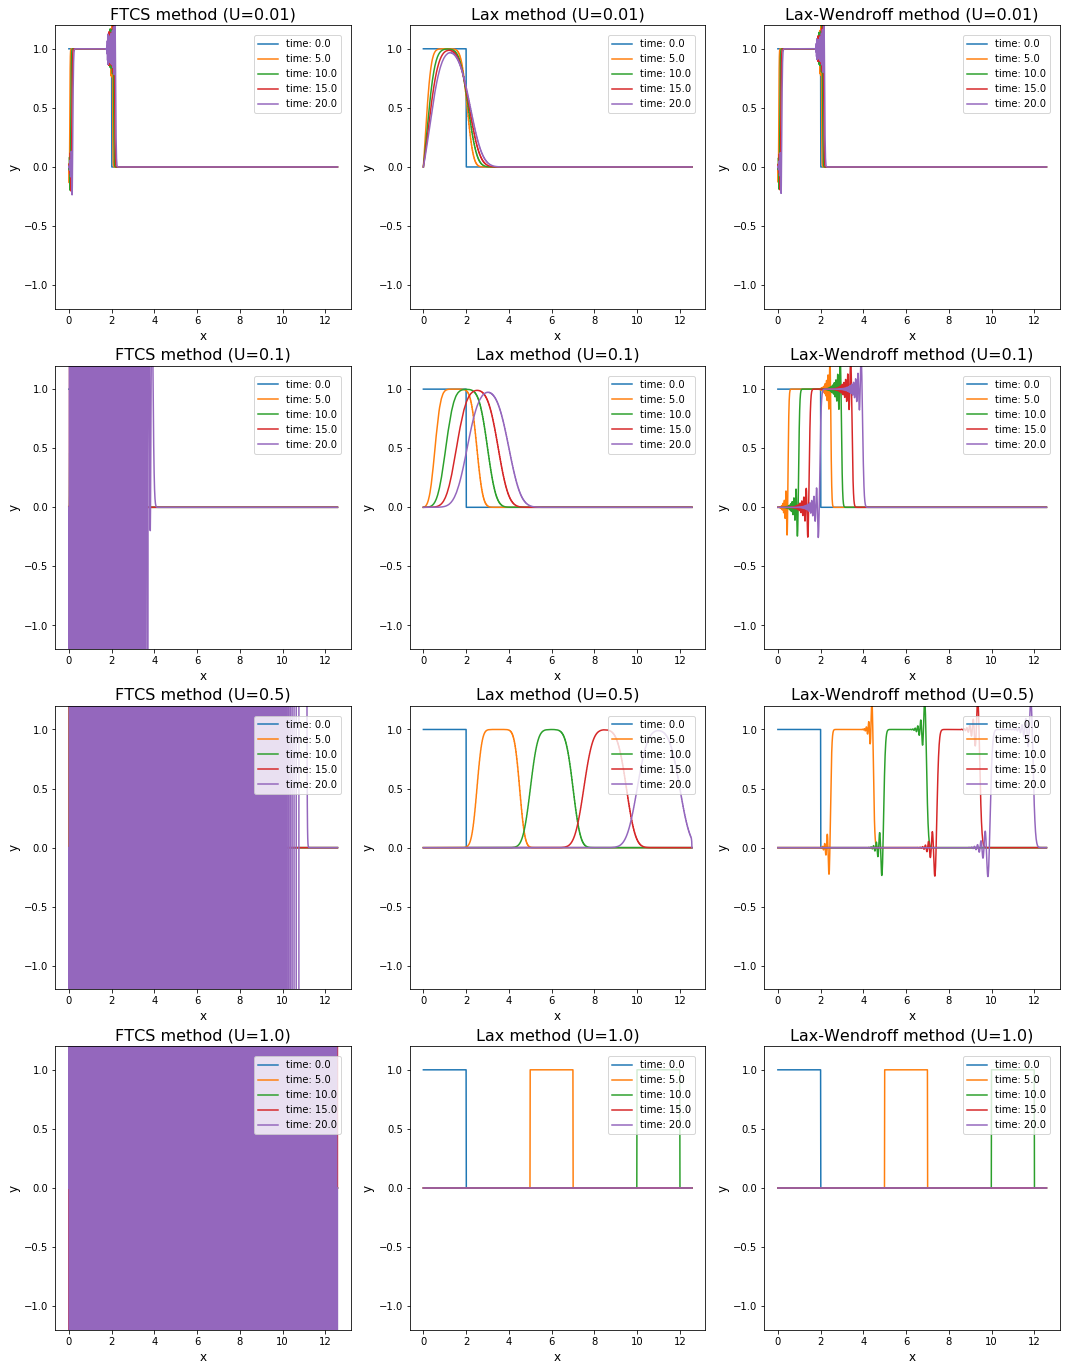

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#初期関数の設定
def f(x):
  x_new = x.copy()
  x_new[x_new <= 2] = 1
  x_new[x_new > 2] = 0
  return x_new
#   x_new[x_new > 2*np.pi] = 0
#   return np.sin(x_new)

#ftcs_method
def ftcs(list_y, j):
  return list_y[j] - v * (list_y[j+1] - list_y[j-1]) / 2 

#lax_wendroff_method
def lax_wen(list_y, j):
  return list_y[j] - v * (list_y[j+1] - list_y[j-1]) / 2 + v**2 * (list_y[j+1] - 2 * list_y[j] + list_y[j-1])/2 

def lax(list_y, j):
  return list_y[j] - v * (list_y[j+1] - list_y[j-1]) / 2 + (list_y[j+1] - 2 * list_y[j] + list_y[j-1])/2 

#次の時間の結果を返却
def return_list_next(list_y, func):
  long = len(list_y)
  list_y_next = np.zeros_like(list_y)
  list_y_next[0] = 0
  list_y_next[-1] = 0
  for j in range(1, long - 1):
      list_y_next[j] = func(list_y, j)
  return list_y_next

#グラフの描画
def show_graph(ax, diff_func, func_name):
  for t in range(2001):
    if t == 0:
      list_y_next = list_y_init
    if t % 500 == 0:
      time = t * DELTA_T
      ax.plot(list_x, list_y_next, label="time: "+str(time))
    list_y_next = return_list_next(list_y_next, diff_func)
  ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1)
  ax.set_xlabel("x", fontsize=12)
  ax.set_ylabel("y", fontsize=12)
  ax.set_title(func_name + " method" + " (U=" + str(u) + ")", fontsize=16)
  ax.set_ylim([-1.2, 1.2])

#各種パラメーター
DELTA_T = 0.01
DELTA_X = 0.01
X_UPPER = 4 * np.pi
X_LOWER = 0
list_x = np.arange(X_LOWER, X_UPPER+DELTA_X, DELTA_X)
list_y_init = f(list_x)
list_u = [0.01, 0.1, 0.5, 1.0]

#計算アンド描画
col_size = len(list_u)
fig, axs = plt.subplots(col_size, 3, figsize=(18, 6*col_size))
for i, u in enumerate(list_u):
  v = u * DELTA_T / DELTA_X
  show_graph(axs[i, 0], ftcs, "FTCS")
  show_graph(axs[i, 1], lax, "Lax")
  show_graph(axs[i, 2], lax_wen, "Lax-Wendroff")
plt.savefig("task1_1_square.png")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


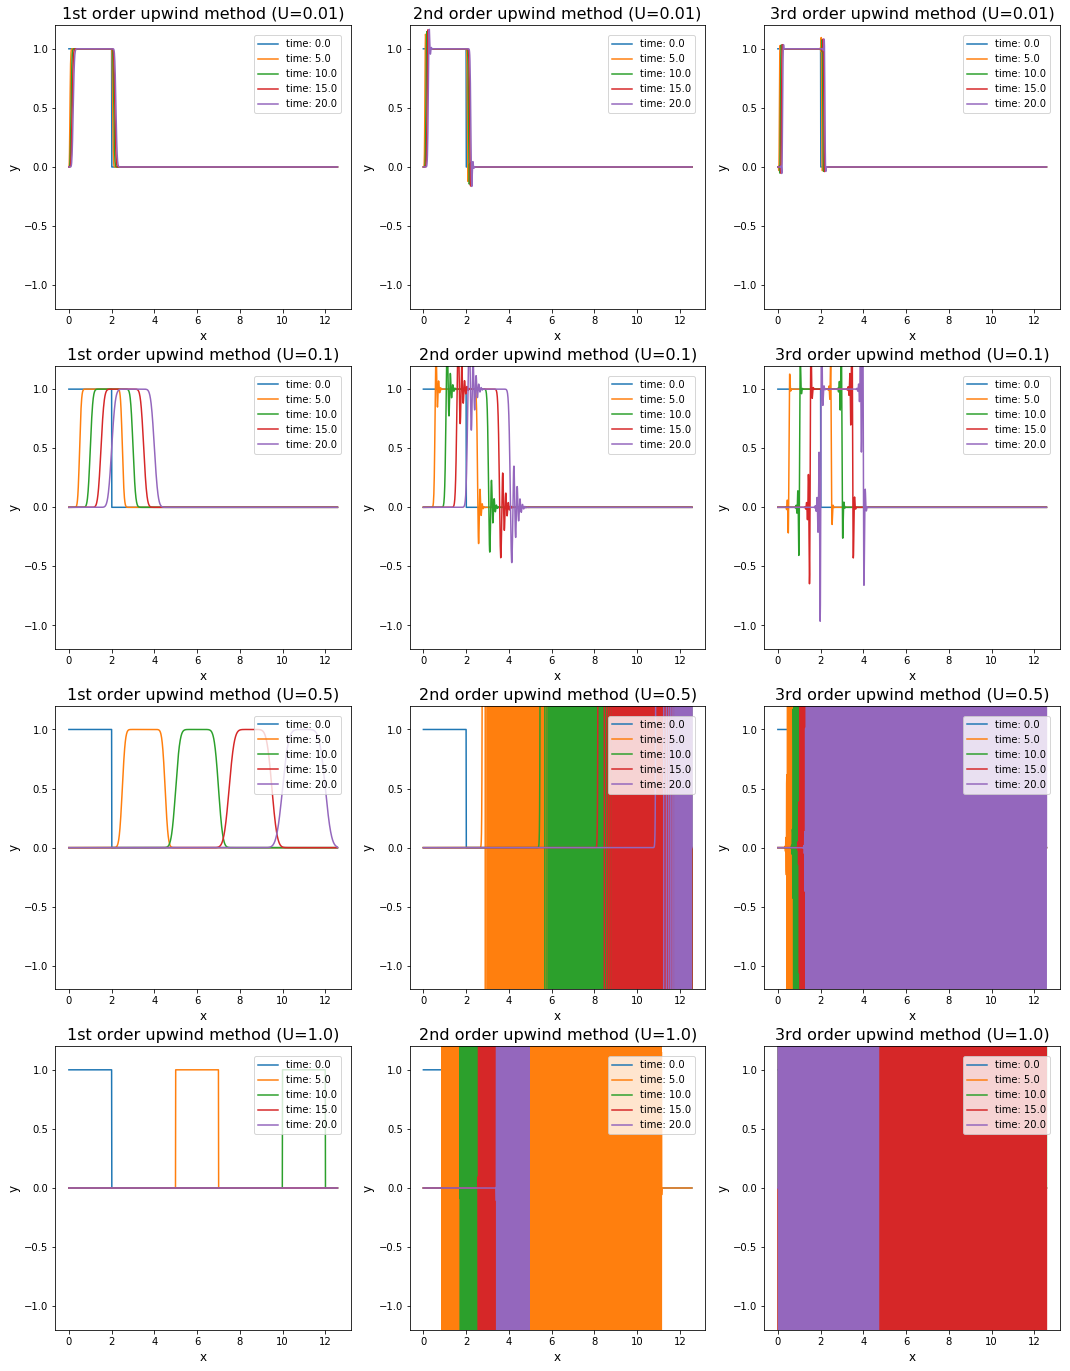

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#初期関数の設定
def f(x):
  x_new = x.copy()
  x_new[x_new <= 2] = 1
  x_new[x_new > 2] = 0
  return x_new
#   x_new[x_new > 2*np.pi] = 0
#   return np.sin(x_new)

#風上一次
def upwind_1st(list_y, j):
  return list_y[j] - v * (list_y[j] - list_y[j-1])

#風上二次
def upwind_2nd(list_y, j):
  return list_y[j] - v * (3 * list_y[j] - 4 * list_y[j-1] + list_y[j-2]) / 2

#風上三次
def upwind_3rd(list_y, j):
  return list_y[j] - v * (2 * list_y[j+1] + 3 * list_y[j] - 6 * list_y[j-1] + list_y[j-2]) / 6

dict_upwind = {
    1 : {"func" : upwind_1st, "name" : "1st order upwind method"},
    2 : {"func" : upwind_2nd, "name" : "2nd order upwind method"},
    3 : {"func" : upwind_3rd, "name" : "3rd order upwind method"}
}

#風上差分を行う1: 1st order, 2: 2nd order, 3: 2rd order
def return_list_next_upwind(list_y, order):
  func_upwind = dict_upwind[order]["func"]
  long = len(list_y)
  list_y_next = np.zeros_like(list_y)
  for i in range(order):
    if i == 2:
      i = -2
    list_y_next[i] = 0
  list_y_next[-1] = 0
  for j in range(order, long - 1):
      list_y_next[j] = func_upwind(list_y, j)
  return list_y_next

#グラフの表示
def show_graphs(ax, order):
  title_name = dict_upwind[order]["name"]  
  for t in range(2001):
    if t == 0:
      list_y_next = list_y_init
    if t % 500 == 0:
      time = t * DELTA_T
      ax.plot(list_x, list_y_next, label="time: "+str(time))
    list_y_next = return_list_next_upwind(list_y_next, order)
  ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1)
  ax.set_xlabel("x", fontsize=12)
  ax.set_ylabel("y", fontsize=12)
  ax.set_title(title_name + " (U=" + str(u) + ")", fontsize=16)
  ax.set_ylim([-1.2, 1.2])
  
#パラメーター
DELTA_T = 0.01
DELTA_X = 0.01
X_UPPER = 4*np.pi
X_LOWER = 0
list_x = np.arange(X_LOWER, X_UPPER+DELTA_X, DELTA_X)
list_y_init = f(list_x)
list_u = [0.01, 0.1, 0.5, 1.0]

#計算アンド描画
col_size = len(list_u)
fig, axs = plt.subplots(col_size, 3, figsize=(18, 6*col_size))
for j, u in enumerate(list_u):
  v = u * DELTA_T / DELTA_X
  for i in range(3):
    show_graphs(axs[j, i], i+1)
plt.savefig("task2_1_square.png")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


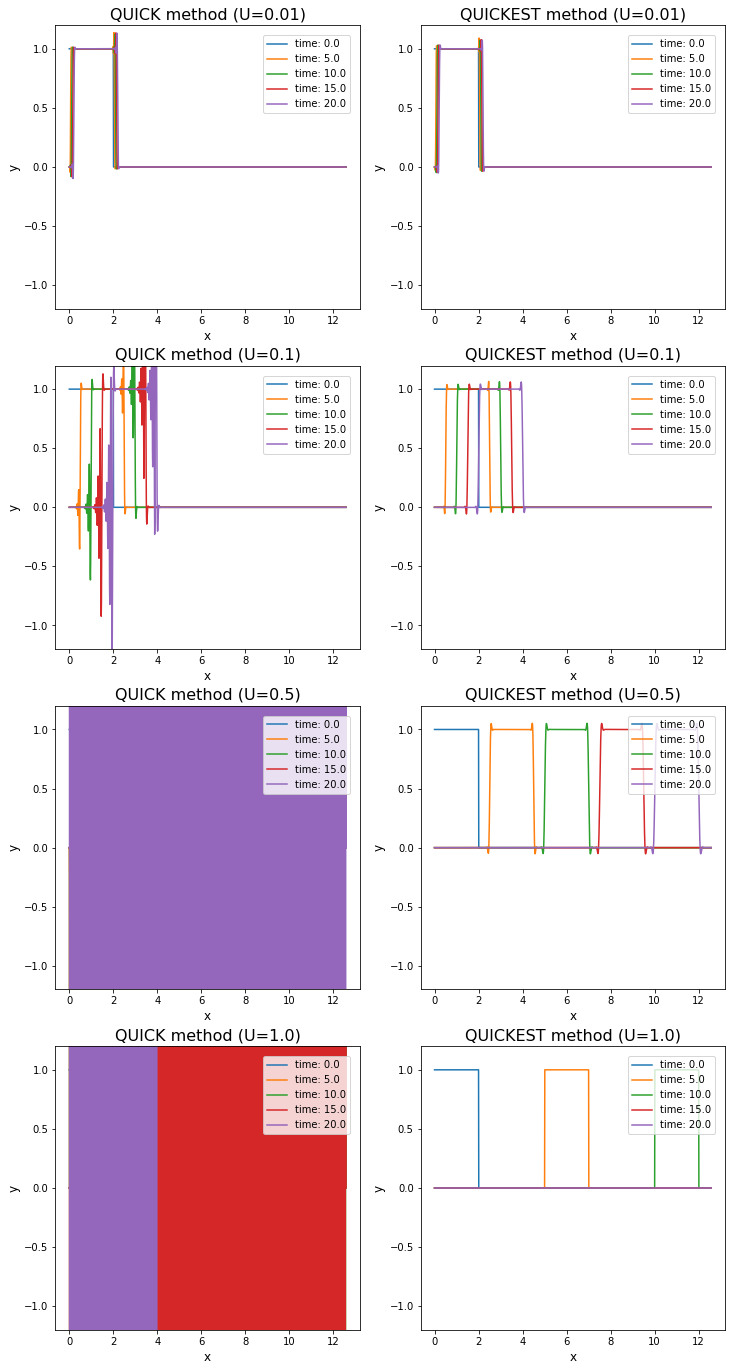

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#初期関数の設定
def f(x):
  x_new = x.copy()
  x_new[x_new <= 2] = 1
  x_new[x_new > 2] = 0
  return x_new
#   x_new[x_new > 2*np.pi] = 0
#   return np.sin(x_new) 

def quick(list_y, j):
  return list_y[j] - v * (3 * list_y[j+1] + 3 * list_y[j] - 7 * list_y[j-1] + list_y[j-2]) / 8

def quickest(list_y, j):
  return list_y[j] - v * (2 * list_y[j+1] + 3 * list_y[j] - 6 * list_y[j-1] + list_y[j-2]) / 6 + v**2 * (list_y[j+1] - 2 * list_y[j] + list_y[j-1])/2 - v**3 * (list_y[j+1] - 3 * list_y[j] + 3 * list_y[j-1] - list_y[j-2]) / 6

#次の時間の結果を返却
def return_list_next(list_y, func):
  long = len(list_y)
  list_y_next = np.zeros_like(list_y)
  list_y_next[0] = 0
  list_y_next[1] = 0
  list_y_next[-1] = 0
  for j in range(2, long - 1):
      list_y_next[j] = func(list_y, j)
  return list_y_next

#グラフの描画
def show_graph(ax, diff_func, func_name):
  for t in range(2001):
    if t == 0:
      list_y_next = list_y_init
    if t % 500 == 0:
      time = t * DELTA_T
      ax.plot(list_x, list_y_next, label="time: "+str(time))
    list_y_next = return_list_next(list_y_next, diff_func)
  ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1)
  ax.set_xlabel("x", fontsize=12)
  ax.set_ylabel("y", fontsize=12)
  ax.set_title(func_name + " method" + " (U=" + str(u) + ")", fontsize=16)
  ax.set_ylim([-1.2, 1.2])

#各種パラメーター
DELTA_T = 0.01
DELTA_X = 0.01
X_UPPER = 4*np.pi
X_LOWER = 0
list_x = np.arange(X_LOWER, X_UPPER+DELTA_X, DELTA_X)
list_y_init = f(list_x)
list_u = [0.01, 0.1, 0.5, 1.0]

#計算アンド描画
col_size = len(list_u)
fig, axs = plt.subplots(col_size, 2, figsize=(12, 6*col_size))
for i, u in enumerate(list_u):
  v = u * DELTA_T / DELTA_X
  show_graph(axs[i, 0], quick, "QUICK")
  show_graph(axs[i, 1], quickest, "QUICKEST")
plt.savefig("task2_2_square.png")
fig.show()

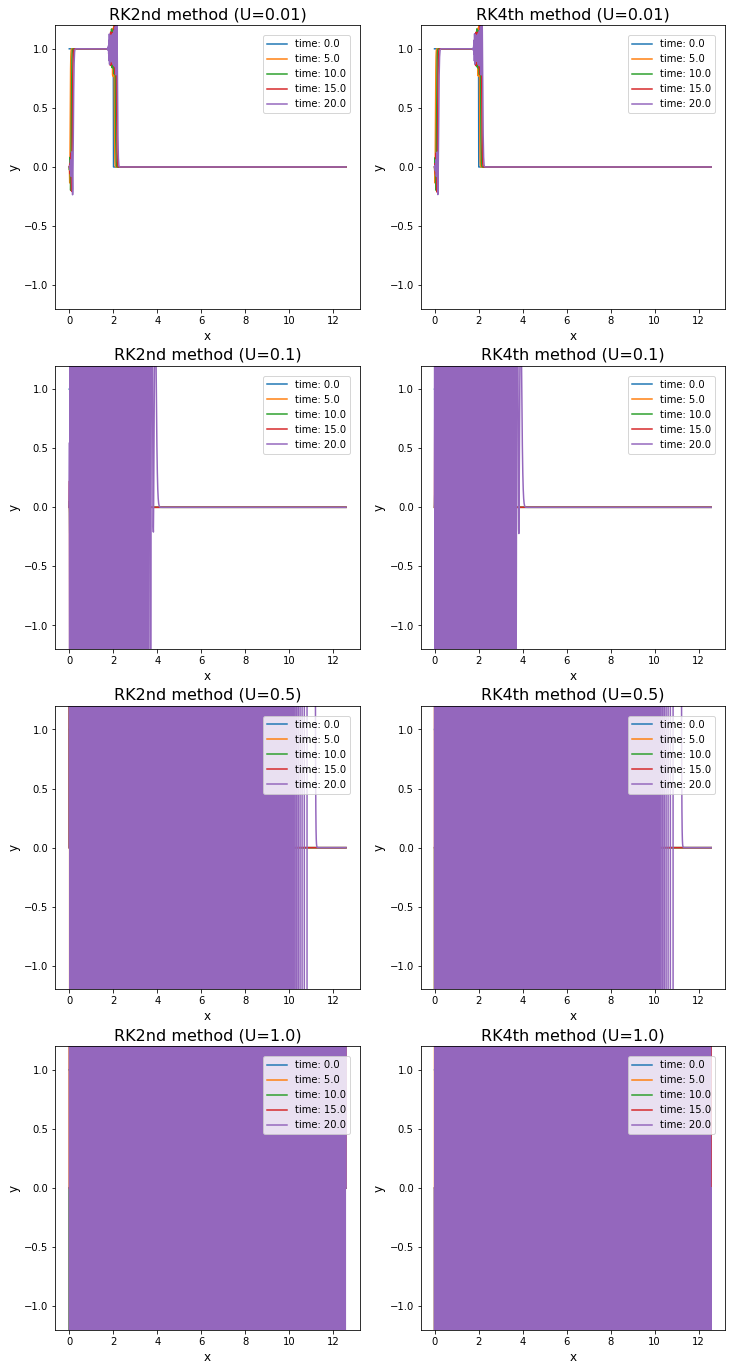

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#初期関数の設定
def f(x):
  x_new = x.copy()
  x_new[x_new <= 2] = 1
  x_new[x_new > 2] = 0
  return x_new
#   x_new[x_new > 2*np.pi] = 0
#   return np.sin(x_new)

#k2ndを計算する
def calc_k_2nd(list_ori, long):
  list_k1 = np.zeros_like(list_ori)
  list_k2 = np.zeros_like(list_ori)
  list_k1[0] = list_ori[1]
  list_k1[-1] = -list_ori[-2]
  list_k2[0] = list_ori[1] + list_k1[0]
  list_k2[-1] = -list_ori[-2] + list_k1[-1] 
  for j in range(1, long-1):
    list_k1[j] = list_ori[j+1] - list_ori[j-1]
    list_k2[j] = list_ori[j+1] - list_ori[j-1] + (list_k1[j] * (j + 1)* DELTA_X - list_k1[j] * (j - 1)* DELTA_X) / 2
  return list_k1, list_k2

#k4thを計算する
def calc_k_4th(list_ori, long):
  list_k1 = np.zeros_like(list_ori)
  list_k2 = np.zeros_like(list_ori)
  list_k3 = np.zeros_like(list_ori)
  list_k4 = np.zeros_like(list_ori)
  list_k1[0] = list_ori[1]
  list_k1[-1] = -list_ori[-2]
  list_k2[0] = list_ori[1] + list_k1[0]
  list_k2[-1] = -list_ori[-2] + list_k1[-1] 
  list_k3[0] = list_ori[1] + list_k2[0]
  list_k3[-1] = -list_ori[-2] + list_k2[-1]
  list_k4[0] = list_ori[1] + 2 * list_k3[0]
  list_k4[-1] = -list_ori[-2] + 2 * list_k3[-1] 
  for j in range(1, long-1):
    list_k1[j] = list_ori[j+1] - list_ori[j-1]
    list_k2[j] = list_ori[j+1] - list_ori[j-1] + (list_k1[j] * (j + 1) * DELTA_X - list_k1[j] * (j - 1) * DELTA_X) / 2
    list_k3[j] = list_ori[j+1] - list_ori[j-1] + (list_k2[j] * (j + 1) * DELTA_X - list_k2[j] * (j - 1) * DELTA_X) / 2
    list_k4[j] = list_ori[j+1] - list_ori[j-1] + (list_k3[j] * (j + 1) * DELTA_X - list_k3[j] * (j - 1) * DELTA_X)
  return list_k1, list_k2 , list_k3, list_k4

#RK 2nd
def RK_2nd(list_y):
  long = len(list_y)
  list_k1, list_k2 = calc_k_2nd(list_y, long)
  
  list_y_next = np.zeros_like(list_y)
  list_y_next[0] = 0
  list_y_next[-1] = 0
  for j in range(1, long - 1):
      list_y_next[j] = list_y[j] - v * (list_k1[j] + list_k2[j]) / 4
  return list_y_next

#RK4th
def RK_4th(list_y):
  long = len(list_y)
  list_k1, list_k2, list_k3, list_k4 = calc_k_4th(list_y, long)
  
  list_y_next = np.zeros_like(list_y)
  list_y_next[0] = 0
  list_y_next[-1] = 0
  for j in range(1, long - 1):
      list_y_next[j] = list_y[j] - v * (list_k1[j] + 2 * list_k2[j] + 2 * list_k3[j] + list_k4[j]) / 12
  return list_y_next

#グラフの描画
def show_graph(ax, diff_func, func_name):
  for t in range(2001):
    if t == 0:
      list_y_next = list_y_init
    if t % 500 == 0:
      time = t * DELTA_T
      ax.plot(list_x, list_y_next, label="time: "+str(time))
    list_y_next = diff_func(list_y_next)
  ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1)
  ax.set_xlabel("x", fontsize=12)
  ax.set_ylabel("y", fontsize=12)
  ax.set_title(func_name + " method" + " (U=" + str(u) + ")", fontsize=16)
  ax.set_ylim([-1.2, 1.2])

#各種パラメーター
DELTA_T = 0.01
DELTA_X = 0.01
X_UPPER = 4 * np.pi
X_LOWER = 0
list_x = np.arange(X_LOWER, X_UPPER+DELTA_X, DELTA_X)
list_y_init = f(list_x)
list_u = [0.01, 0.1, 0.5, 1.0]
# u = 0.1
# v = u * DELTA_T / DELTA_X
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# show_graph(ax, RK_2nd, "RK_2nd")
# fig.show()

#計算アンド描画
col_size = len(list_u)
fig, axs = plt.subplots(col_size, 2, figsize=(12, 6*col_size))
for i, u in enumerate(list_u):
  v = u * DELTA_T / DELTA_X
  show_graph(axs[i, 0], RK_2nd, "RK2nd")
  show_graph(axs[i, 1], RK_4th, "RK4th")
plt.savefig("task1_2_square.png")
fig.show()

In [0]:


# #kを計算する
# def calc_k(list_ori, long):
#   list_k = np.zeros_like(list_ori)
#   list_k[0] = list_ori[1]
#   list_k[-1] = - list_ori[-2]
#   for j in range(1, long-1):
#     list_k[j] = list_ori[j+1] - list_ori[j-1]
#   return list_k

# #RK 2nd
# def RK_2nd(list_y):
#   long = len(list_y)
#   #k1
#   list_k1 = calc_k(list_y, long)
#   #k2
#   list_y_dash1 = list_y + list_k1 / 2
#   list_k2 = calc_k(list_y_dash1, long)
  
#   list_y_next = np.zeros_like(list_y)
#   list_y_next[0] = 0
#   list_y_next[-1] = 0
#   for j in range(1, long - 1):
#       list_y_next[j] = list_y[j] - v * (list_k1[j] + list_k2[j]) / 4
#   return list_y_next

# #RK4th
# def RK_4th(list_y):
#   long = len(list_y)
#   #k1
#   list_k1 = calc_k(list_y, long)
#   #k2
#   list_y_dash1 = list_y + list_k1 / 2
#   list_k2 = calc_k(list_y_dash1, long)
#   #k3
#   list_y_dash2 = list_y + list_k2 /2
#   list_k3 = calc_k(list_y_dash2, long)
#   #k4
#   list_y_dash3 = list_y + list_k3
#   list_k4 = calc_k(list_y_dash3, long)
  
#   list_y_next = np.zeros_like(list_y)
#   list_y_next[0] = 0
#   list_y_next[-1] = 0
#   for j in range(1, long - 1):
#       list_y_next[j] = list_y[j] - v * (list_k1[j] + 2 * list_k2[j] + 2 * list_k3[j] + list_k4[j]) / 12
#   return list_y_next